<div style="text-align:center; font-size:60px">Réaliser par :</br>
EL GUASMI Soulaymane et
CHARIT Mohamed Yassine
</div>

# Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
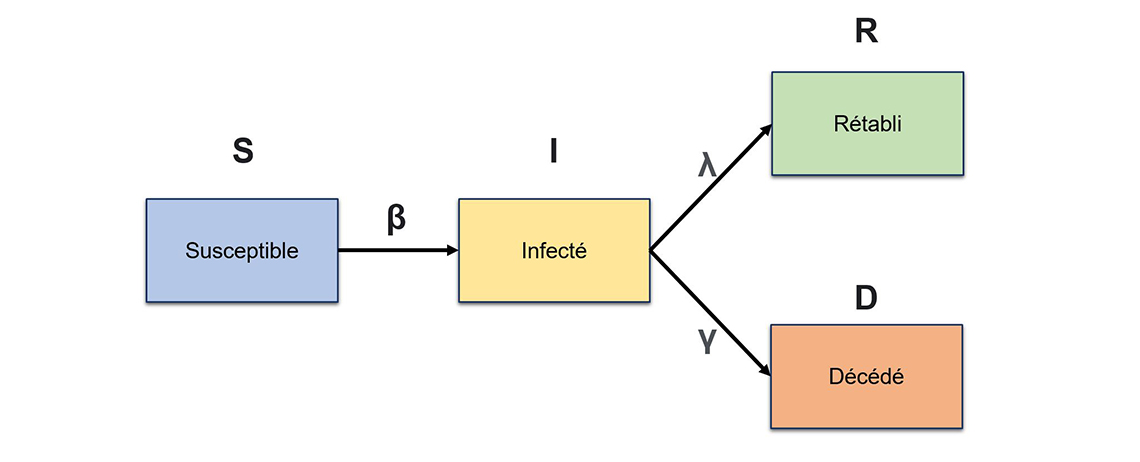


# Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

# Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

# Discrétisation :
<img src="./math_deriv.jpeg">

In [1]:
#0 et 1
import numpy as np
import matplotlib.pyplot as plt

def sird_euler(beta, gamma, mu, S0, I0, R0, D0, dt, T):
    # Nombre de pas de temps
    n_steps = int(T / dt)
    
    # Initialisation des tableaux pour S, I, R, D
    S = np.zeros(n_steps)
    I = np.zeros(n_steps)
    R = np.zeros(n_steps)
    D = np.zeros(n_steps)
    t = np.zeros(n_steps)
    
    # Conditions initiales
    S[0] = S0
    I[0] = I0
    R[0] = R0
    D[0] = D0
    
    # Boucle de simulation
    for step in range(1, n_steps):
        S[step] = S[step-1] - dt * beta * S[step-1] * I[step-1]
        I[step] = I[step-1] + dt * (beta * S[step-1] * I[step-1] - gamma * I[step-1] - mu * I[step-1])
        R[step] = R[step-1] + dt * gamma * I[step-1]
        D[step] = D[step-1] + dt * mu * I[step-1]
        t[step] = t[step-1] + dt
    
    return t, S, I, R, D


# Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

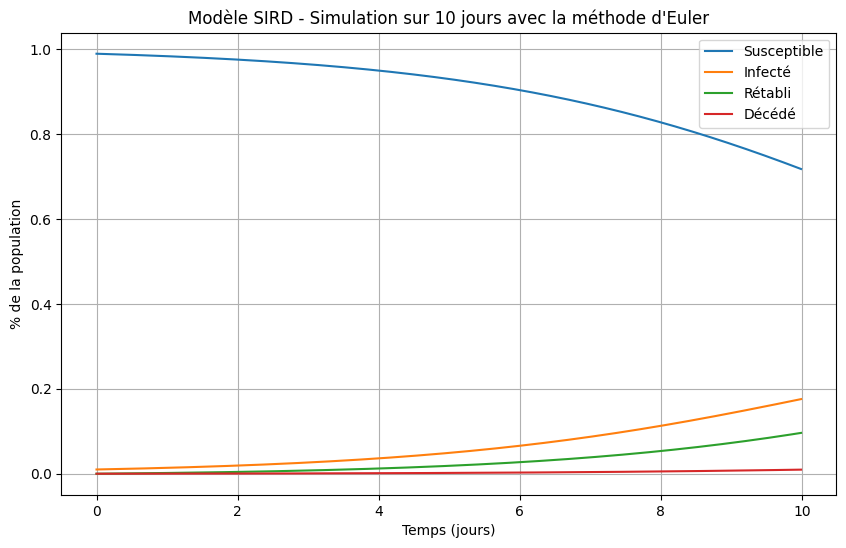

In [2]:
#1
# Paramètres du modèle
beta = 0.5
gamma = 0.15
mu = 0.015

# Conditions initiales
S0 = 0.99  # 99% de la population susceptible
I0 = 0.01  # 1% de la population infectée
R0 = 0.0   # 0% de la population rétablie
D0 = 0.0   # 0% de la population décédée

# Paramètres de la simulation
dt = 0.01
T = 10  # Simuler pour 10 jours

# Exécuter la simulation
t_10, S_10, I_10, R_10, D_10 = sird_euler(beta, gamma, mu, S0, I0, R0, D0, dt, T)

# Tracer les résultats pour 10 jours
plt.figure(figsize=(10, 6))
plt.plot(t_10, S_10, label='Susceptible')
plt.plot(t_10, I_10, label='Infecté')
plt.plot(t_10, R_10, label='Rétabli')
plt.plot(t_10, D_10, label='Décédé')
plt.xlabel('Temps (jours)')
plt.ylabel('% de la population')
plt.title('Modèle SIRD - Simulation sur 10 jours avec la méthode d\'Euler')
plt.legend()
plt.grid(True)
plt.show()

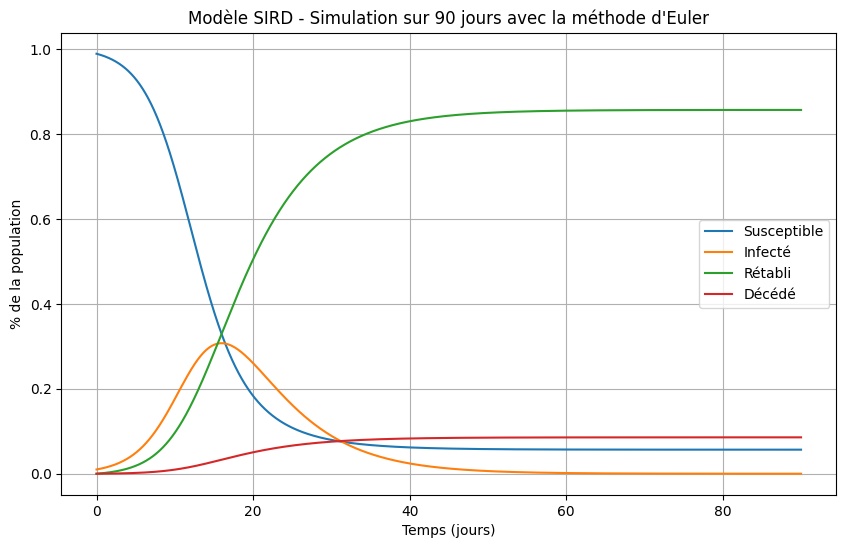

In [3]:
#2
# Paramètres de la simulation
T = 90  # Simuler pour 90 jours

# Exécuter la simulation
t_90, S_90, I_90, R_90, D_90 = sird_euler(beta, gamma, mu, S0, I0, R0, D0, dt, T)

# Tracer les résultats pour 90 jours
plt.figure(figsize=(10, 6))
plt.plot(t_90, S_90, label='Susceptible')
plt.plot(t_90, I_90, label='Infecté')
plt.plot(t_90, R_90, label='Rétabli')
plt.plot(t_90, D_90, label='Décédé')
plt.xlabel('Temps (jours)')
plt.ylabel('% de la population')
plt.title('Modèle SIRD - Simulation sur 90 jours avec la méthode d\'Euler')
plt.legend()
plt.grid(True)
plt.show()

# Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

# Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

# Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


<span style="font-size:30px; color:green">La réponse :</span>
</br>
#### on a choisi La MSE parceque nous cherchons à prédire des valeurs continues (pourcentage de populations), la Categorical Cross-Entropy (CCE) est plus appropriée pour les problèmes de classification

In [4]:
import pandas as pd

# Lire les données du fichier CSV
df = pd.read_csv('sird_dataset.csv')

# Afficher les premières lignes du dataframe pour vérifier le contenu
print(df.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [5]:
def mse(observed, predicted):
    return np.mean((observed - predicted) ** 2)

In [6]:
def simulate_sird(params, S0, I0, R0, D0, dt, T):
    beta, gamma, mu = params
    t, S, I, R, D = sird_euler(beta, gamma, mu, S0, I0, R0, D0, dt, T)
    return t, S, I, R, D

Meilleurs paramètres : β = 0.5 γ = 0.08 μ = 0.005


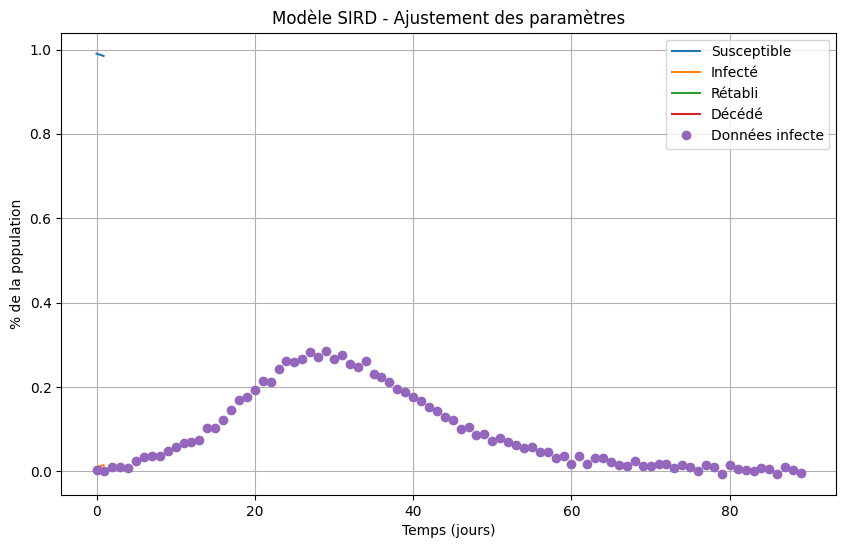

In [7]:
from itertools import product

# Plages de valeurs pour les paramètres
beta_values = np.linspace(0.25, 0.5, 6)
gamma_values = np.linspace(0.08, 0.15, 8)
mu_values = np.linspace(0.005, 0.015, 11)

# Initialiser les meilleures valeurs de paramètres
best_params = None
lowest_cost = float('inf')

# Conditions initiales
S0 = 0.99  # 99% de la population susceptible
I0 = 0.01  # 1% de la population infectée
R0 = 0.0   # 0% de la population rétablie
D0 = 0.0   # 0% de la population décédée

# Paramètres de la simulation
dt = 0.01
T = len(df) * dt  # Simuler pour le nombre de jours correspondant aux données

# Itérer sur toutes les combinaisons de paramètres
for beta, gamma, mu in product(beta_values, gamma_values, mu_values):
    t, S, I, R, D = simulate_sird([beta, gamma, mu], S0, I0, R0, D0, dt, T)
    cost = mse(df['Infectés'], I[:len(df)])  # Calculer le coût pour les données observées
    if cost < lowest_cost:
        lowest_cost = cost
        best_params = (beta, gamma, mu)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : β =", best_params[0], "γ =", best_params[1], "μ =", best_params[2])

# Simuler avec les meilleurs paramètres
t, S, I, R, D = simulate_sird(best_params, S0, I0, R0, D0, dt, T)

# Tracer les résultats avec les données empiriques
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infecté')
plt.plot(t, R, label='Rétabli')
plt.plot(t, D, label='Décédé')
plt.plot(df['Jour'], df['Infectés'], 'o', label='Données infecte')
plt.xlabel('Temps (jours)')
plt.ylabel('% de la population')
plt.title('Modèle SIRD - Ajustement des paramètres')
plt.legend()
plt.grid(True)
plt.show()

# Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

# 1. Parametre d'observation :

1. $R_0​<1$ : Lorsque R0R0​ est inférieur à 1, cela signifie qu'une personne infectée contamine en moyenne moins d'une autre personne. Dans ce cas, l'épidémie est susceptible de diminuer et éventuellement de s'éteindre, car chaque cycle d'infection produit de moins en moins de nouveaux cas.

1. $R_0​>1$ : Lorsque R0R0​ est supérieur à 1, cela signifie qu'une personne infectée contamine en moyenne plus d'une autre personne. Dans ce cas, l'épidémie est susceptible de se propager et de croître, car chaque cycle d'infection produit de plus en plus de nouveaux cas.

# 2. Introduction des mesures de distanciation sociale :

Nombre de reproduction de base (R0) : 5.88235294117647


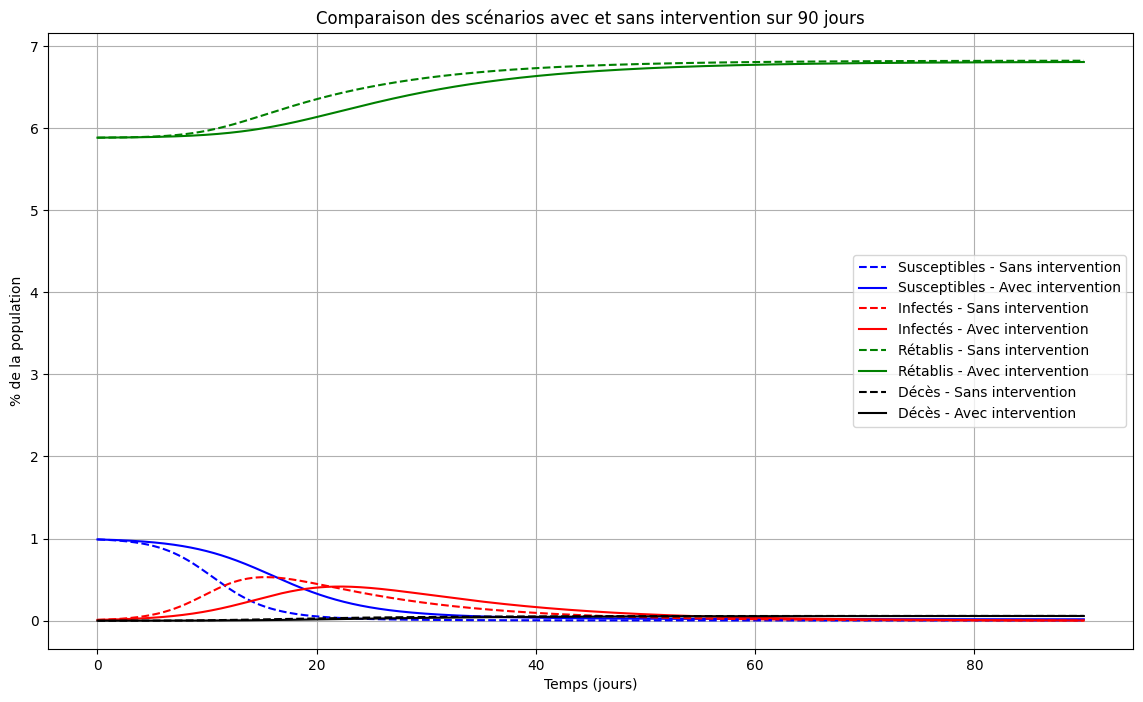

In [8]:
# Simuler pour 90 jours avec et sans intervention
T = 90  # Simuler pour 90 jours

# Calculer R0 avec les meilleurs paramètres
R0 = best_params[0] / (best_params[1] + best_params[2])
print("Nombre de reproduction de base (R0) :", R0)

# Simuler sans intervention
t_no_intervention, S_no_intervention, I_no_intervention, R_no_intervention, D_no_intervention = simulate_sird(best_params, S0, I0, R0, D0, dt, T)

# Introduire une intervention (réduction de 30% de β)
reduced_beta = best_params[0] * 0.7
reduced_params = (reduced_beta, best_params[1], best_params[2])

# Simuler avec intervention
t_intervention, S_intervention, I_intervention, R_intervention, D_intervention = simulate_sird(reduced_params, S0, I0, R0, D0, dt, T)

# Tracer les scénarios avec et sans intervention dans un seul graphique
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(t_no_intervention, S_no_intervention, label='Susceptibles - Sans intervention', linestyle='--', color='blue')
plt.plot(t_intervention, S_intervention, label='Susceptibles - Avec intervention', linestyle='-', color='blue')

# Infectés
plt.plot(t_no_intervention, I_no_intervention, label='Infectés - Sans intervention', linestyle='--', color='red')
plt.plot(t_intervention, I_intervention, label='Infectés - Avec intervention', linestyle='-', color='red')

# Rétablis
plt.plot(t_no_intervention, R_no_intervention, label='Rétablis - Sans intervention', linestyle='--', color='green')
plt.plot(t_intervention, R_intervention, label='Rétablis - Avec intervention', linestyle='-', color='green')

# Décès
plt.plot(t_no_intervention, D_no_intervention, label='Décès - Sans intervention', linestyle='--', color='black')
plt.plot(t_intervention, D_intervention, label='Décès - Avec intervention', linestyle='-', color='black')

plt.xlabel('Temps (jours)')
plt.ylabel('% de la population')
plt.title('Comparaison des scénarios avec et sans intervention sur 90 jours')
plt.legend()
plt.grid(True)
plt.show()

# 3. Comparaison des scénarios

3. Sans intervention (en utilisant les meilleurs paramètres trouvés précédemment).</br>
 Avec intervention (réduction de ββ due à des mesures de distanciation sociale).